In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
import scipy.stats

In [2]:
def VoidCorregido(ellip_cat):
    
    BoxLength = 720
    Trim = 30
    
    halfboxtrim = BoxLength/2 - Trim

    index = np.where( 
            (abs(ellip_cat[:,1]) < halfboxtrim)   & 
            (abs(ellip_cat[:,2]) < halfboxtrim)   & 
            (abs(ellip_cat[:,3]) < halfboxtrim) )
    
    return ellip_cat[index]

In [4]:
Catalogos=[]
for i in range(10):
    V=np.loadtxt("Desktop/Datos/cosmos_0"+str(i)+".vae",delimiter=",")
    Catalogos.append(V)
for i in range(10,40):
    V=np.loadtxt("Desktop/Datos/cosmos_"+str(i)+".vae",delimiter=",")
    Catalogos.append(V)

In [5]:
#Corregir Catálogos
CatalogosCorregidos=[]
for i in range(len(Catalogos)):
    VC=VoidCorregido(Catalogos[i])
    CatalogosCorregidos.append(VC)

In [56]:
#colores=["b","g","y","black","m","q","w","e","r","t","p","m"]

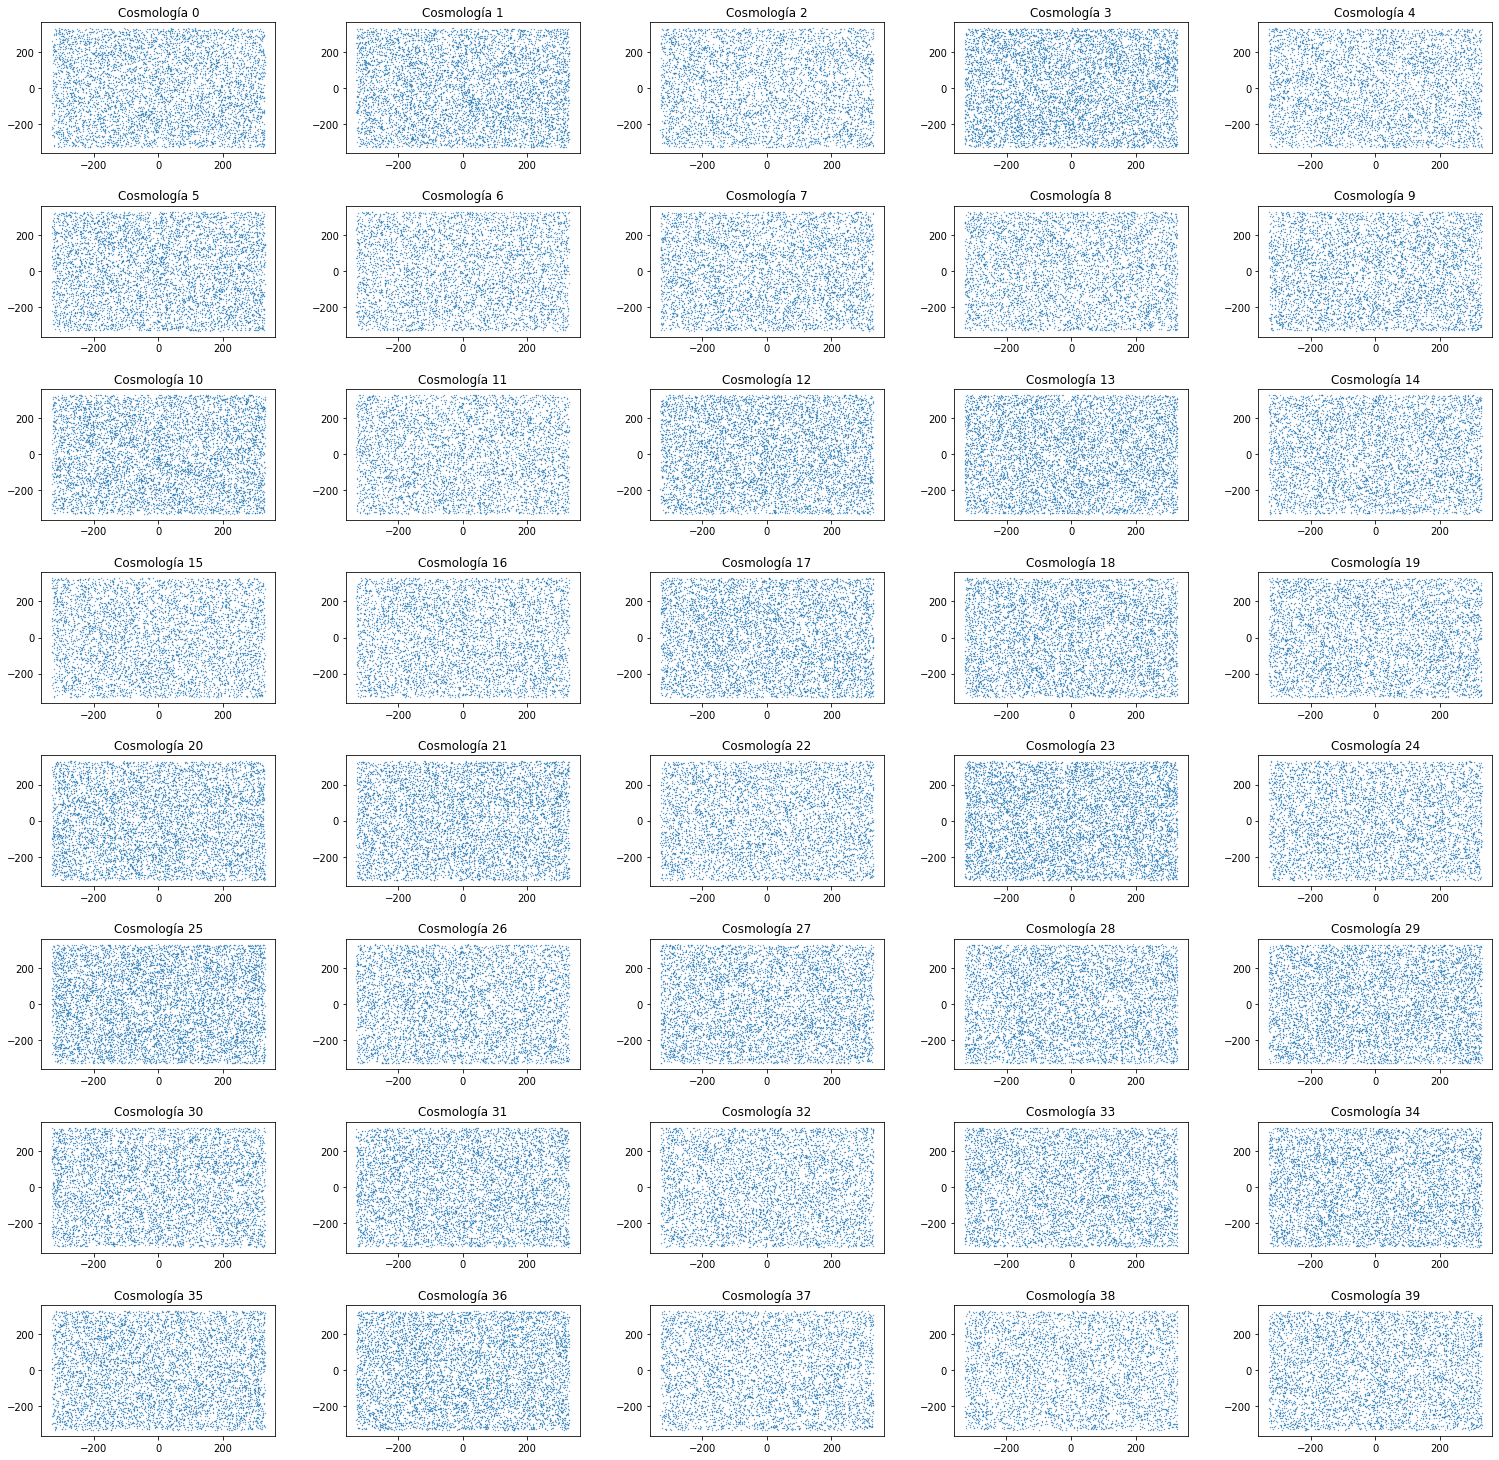

In [8]:
fig, axs = plt.subplots(8,5, figsize=(26, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(len(CatalogosCorregidos)):
    V=CatalogosCorregidos[i]
    axs[i].set_title("Cosmología " + str(i))
    axs[i].scatter(V[:,1],V[:,2],s=0.1)
    
#plt.savefig("Cosmologias.png")

In [9]:
def datosGeo(Catalogo):
    a=Catalogo[:,6]
    b=Catalogo[:,7]
    c=Catalogo[:,8]
    def elip(a,b,c):
        return (1/4)*(a**2 - c**2)/(a**2 + b**2 + c**2)
    def elip1(a,c):
        return 1 - (c/a)
    def prol(a,b,c):
        return (1/4)*((b**2 - c**2)+ (b**2 - a**2))/(a**2 + b**2 + c**2)
    rt=[elip1(a,c),elip(a,b,c),prol(a,b,c)]
    
    return rt

In [10]:
datosGeometricos=[]
for i in range(len(CatalogosCorregidos)):
    d=datosGeo(CatalogosCorregidos[i])
    datosGeometricos.append(d)

In [11]:
len(datosGeometricos[0][0])

5167

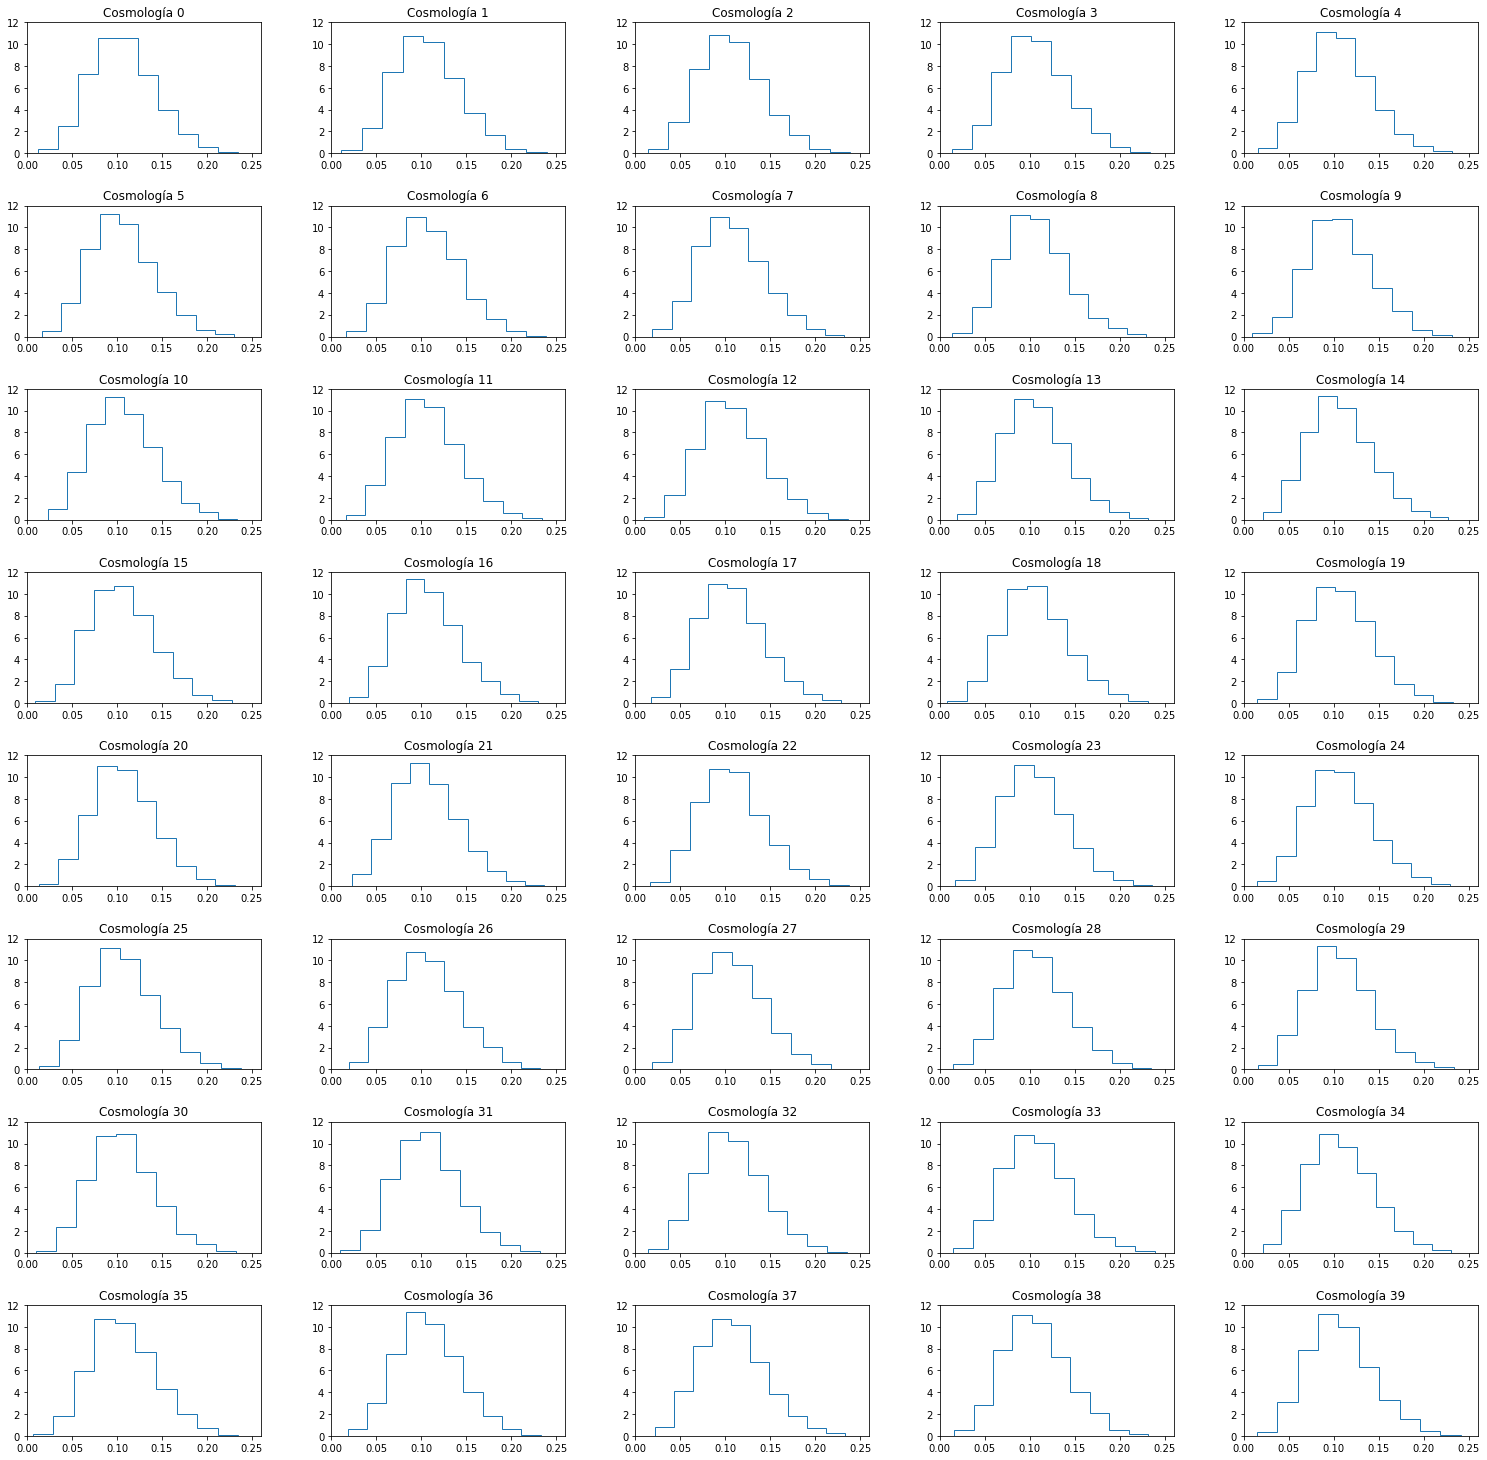

In [12]:
#Elipticidad Normal
fig, axs = plt.subplots(8,5, figsize=(26, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(len(CatalogosCorregidos)):
    axs[i].set_title("Cosmología " + str(i))
    e=datosGeometricos[i][1]
    axs[i].hist(e,density=True, histtype="step")
    axs[i].set_xlim(0,0.26)
    axs[i].set_ylim(0,12)
    
#plt.savefig("ElipticidadNormal.png")

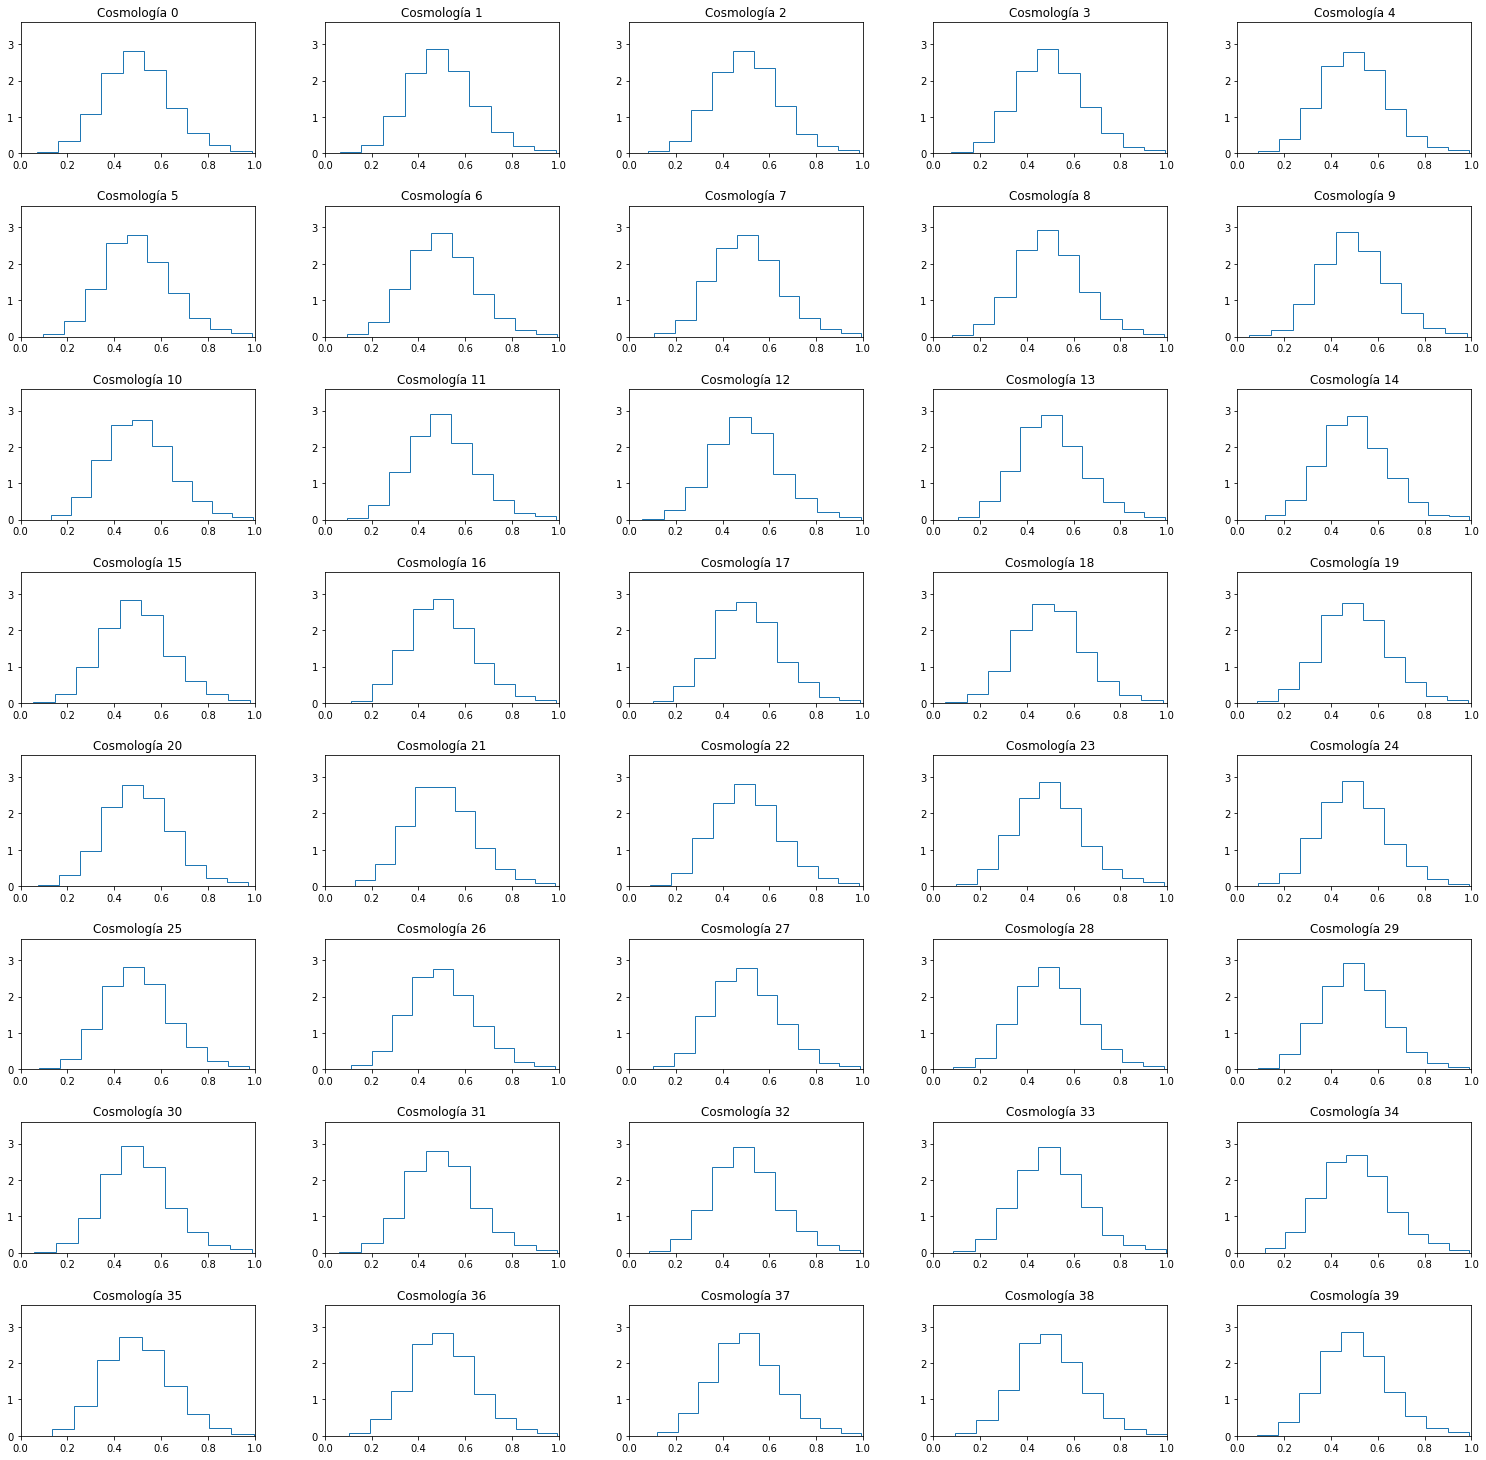

In [13]:
#Elipticidad: 1-c/a
fig, axs = plt.subplots(8,5, figsize=(26, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(len(CatalogosCorregidos)):
    axs[i].set_title("Cosmología " + str(i))
    e=datosGeometricos[i][0]
    axs[i].hist(e,density=True, histtype="step")
    axs[i].set_xlim(0,1)
    axs[i].set_ylim(0,3.6)
#plt.savefig("ElipticidadCA.png")

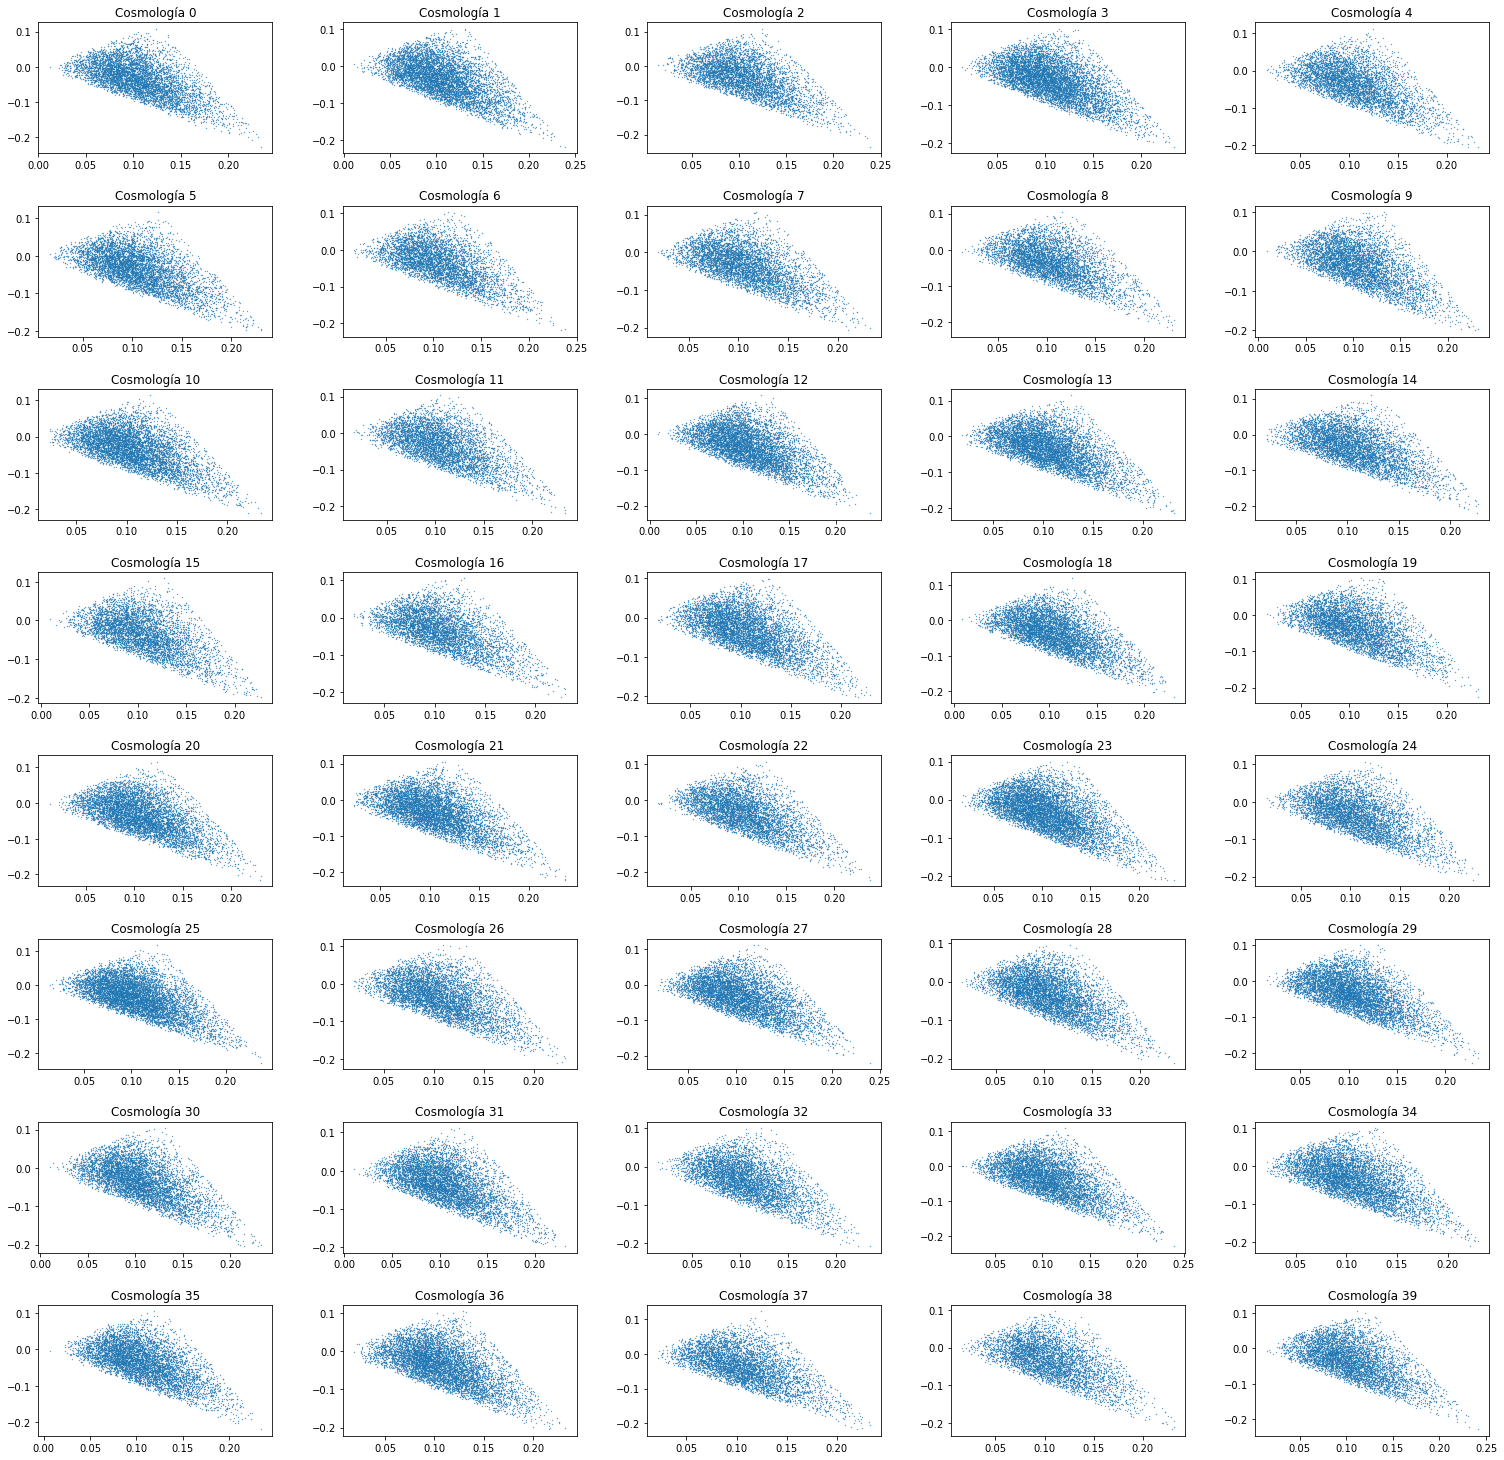

In [14]:
#Elipticidad Vs. Prolacidad
fig, axs = plt.subplots(8,5, figsize=(26, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(len(CatalogosCorregidos)):
    axs[i].set_title("Cosmología " + str(i))
    e=datosGeometricos[i][1]
    p=datosGeometricos[i][2]
    axs[i].scatter(e,p,s=0.1)

#plt.savefig("DensidadCosmologias.png")

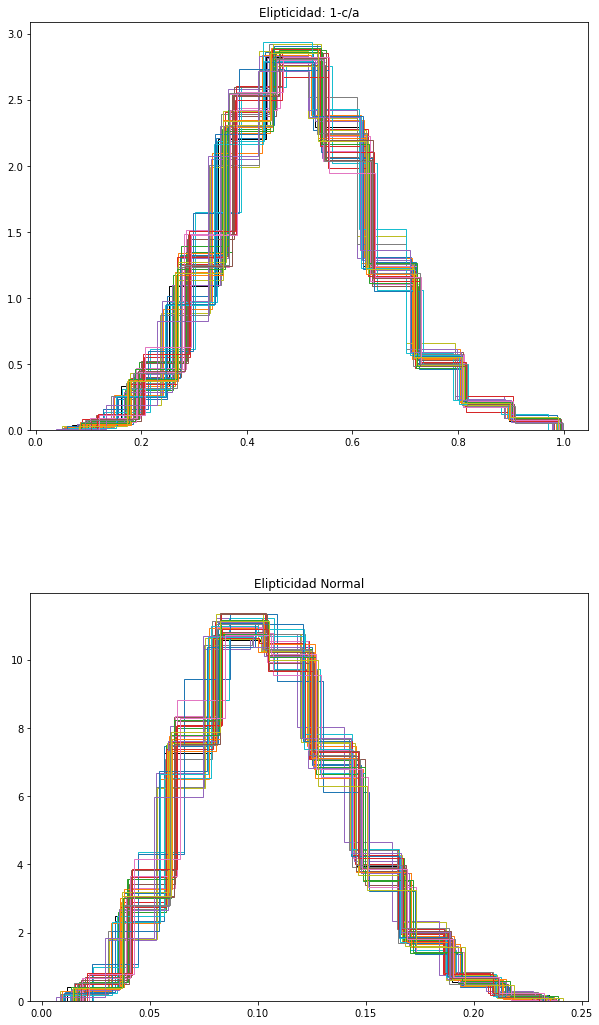

In [16]:
#Elipticidad Vs. Prolacidad
fig, axs = plt.subplots(2,1, figsize=(10, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
axs[0].set_title("Elipticidad: 1-c/a")
axs[1].set_title("Elipticidad Normal")
#Caso del 0
e10=datosGeometricos[0][0]
e0=datosGeometricos[0][1]
p0=datosGeometricos[0][2]
axs[0].hist(e10,density=True, histtype="step",label="Cosmología " + str(0),color="black")
axs[1].hist(e0,density=True, histtype="step",label="Cosmología " + str(0),color="black")
#Todos menos el 0
for i in range(len(CatalogosCorregidos)-1):
    e1=datosGeometricos[i+1][0]
    e=datosGeometricos[i+1][1]
    p=datosGeometricos[i+1][2]
    axs[0].hist(e1,density=True, histtype="step",label="Cosmología " + str(i+1))
    axs[1].hist(e,density=True, histtype="step",label="Cosmología " + str(i+1))
#axs[0].legend(loc=0)
#axs[1].legend(loc=0)
#plt.savefig("datosElip.png")

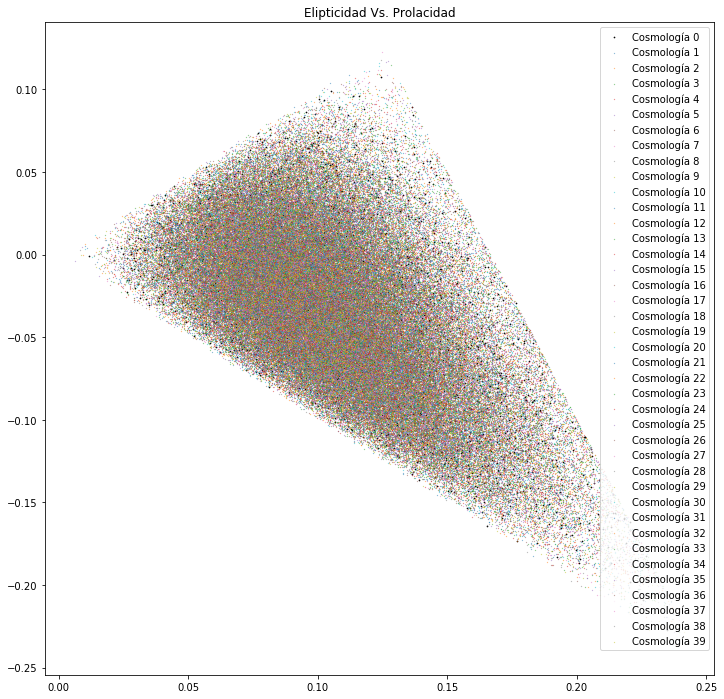

In [17]:
fig=plt.figure(figsize=(12,12))
plt.title("Elipticidad Vs. Prolacidad")
plt.scatter(e0,p0,s=0.45,label="Cosmología " + str(0),color="black")
for i in range(len(CatalogosCorregidos)-1):
    e=datosGeometricos[i+1][1]
    p=datosGeometricos[i+1][2]
    plt.scatter(e,p,s=0.04,label="Cosmología " + str(i+1))
plt.legend(loc=0)
#plt.savefig("datosElipProl.png")

In [18]:
def percentiles(data1):
    data=np.asarray(data1)
    return [np.abs(np.percentile(data,25)),np.percentile(data,50),np.abs(np.percentile(data,75))]

In [19]:
percentilE=[]
percentilE1=[]
for i in range(len(CatalogosCorregidos)):
    e=datosGeometricos[i][1]
    e1=datosGeometricos[i][0]
    d=percentiles(e1)
    f=percentiles(e)
    percentilE.append(f)
    percentilE1.append(d)
percentilE=np.asarray(percentilE)
percentilE1=np.asarray(percentilE1)

In [52]:
percentilE[:,1]

array([0.10437738, 0.10472542, 0.10451   , 0.10494773, 0.10406891,
       0.10323395, 0.10490467, 0.10472611, 0.10457837, 0.10499125,
       0.10477782, 0.10503569, 0.10412557, 0.10451179, 0.10462346,
       0.10423297, 0.10404213, 0.10500691, 0.10453675, 0.1052013 ,
       0.10503298, 0.10379642, 0.10551322, 0.10373709, 0.10524221,
       0.10461449, 0.10494898, 0.10457425, 0.10541022, 0.10418619,
       0.10401403, 0.10491546, 0.10444368, 0.10555423, 0.10520295,
       0.10428382, 0.10545642, 0.10584104, 0.10418474, 0.10438154])

In [21]:
dataE1=np.asarray([np.mean(percentilE1[:,0]),np.mean(percentilE1[:,1]),np.mean(percentilE1[:,2])])

In [22]:
dataE=np.asarray([np.mean(percentilE[:,0]),np.mean(percentilE[:,1]),np.mean(percentilE[:,2])])

In [23]:
print("El valor medio de la Elipticidad es: "+str(dataE1[1]))

El valor medio de la Elipticidad es: 0.49641637089485524


In [24]:
print("El valor medio de la Elipticidad es: " + str(dataE[1]))

El valor medio de la Elipticidad es: 0.10466230365437576


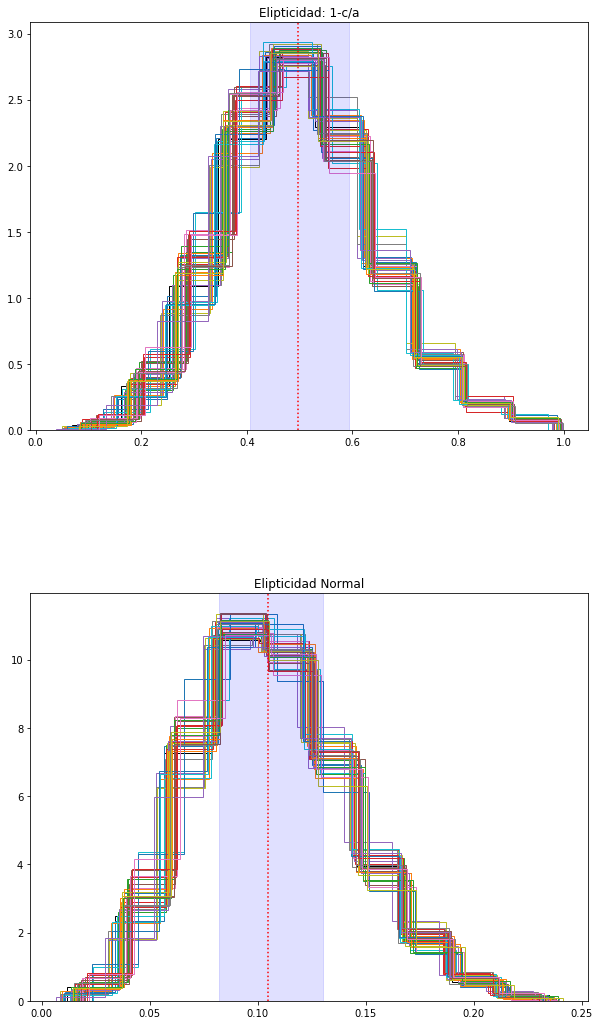

In [25]:
#Elipticidad Vs. Prolacidad
fig, axs = plt.subplots(2,1, figsize=(10, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
axs[0].set_title("Elipticidad: 1-c/a")
axs[1].set_title("Elipticidad Normal")
#Caso del 0
e10=datosGeometricos[0][0]
e0=datosGeometricos[0][1]
p0=datosGeometricos[0][2]
axs[0].hist(e10,density=True, histtype="step",label="Cosmología " + str(0),color="black")
axs[1].hist(e0,density=True, histtype="step",label="Cosmología " + str(0),color="black")
#Todos menos el 0
for i in range(len(CatalogosCorregidos)-1):
    e1=datosGeometricos[i+1][0]
    e=datosGeometricos[i+1][1]
    p=datosGeometricos[i+1][2]
    axs[0].hist(e1,density=True, histtype="step",label="Cosmología " + str(i+1))
    axs[1].hist(e,density=True, histtype="step",label="Cosmología " + str(i+1))
#axs[0].legend(loc=0)
#axs[1].legend(loc=0)
axs[0].axvline(dataE1[1],ls = 'dotted',c='red')
axs[0].axvspan(dataE1[0],dataE1[2],alpha=0.12,color='b')
axs[1].axvline(dataE[1],ls = 'dotted',c='red')
axs[1].axvspan(dataE[0],dataE[2],alpha=0.12,color='b')
#plt.savefig("datosElip2.png")

In [27]:
#colores=["Black","Blue","Orange","green","red","purple","brown","pink","grey","y","c","steelblue"]

In [28]:
#Cálculo del Radio Máximo de los Voids
Rmax=[]
VecMax=[]
MaxX=[]
MaxY=[]
for i in range(len(CatalogosCorregidos)):
    V=CatalogosCorregidos[i]
    Rmax.append(np.max(V[:,5]))
    index1 = np.where(V[:,5]==Rmax[i])
    
    def VecindadMaximo(ellip_cat,d):
    
        BoxLength = d
        Trim = 10
    
        halfboxtrim = BoxLength/2 - Trim
    
        a=ellip_cat[index1,1]
        b=ellip_cat[index1,2]
        c=ellip_cat[index1,3]

        index = np.where( 
                (np.abs(ellip_cat[:,1]-a) < halfboxtrim)   & 
                (np.abs(ellip_cat[:,2]-b) < halfboxtrim)   & 
                (np.abs(ellip_cat[:,3]-c) < halfboxtrim) )
    
        return ellip_cat[index[1]]
    VecMax.append(VecindadMaximo(V,200))
    a1=V[index1,1][0][0]
    b1=V[index1,2][0][0]
    MaxX.append(a1)
    MaxY.append(b1)

In [29]:
Rmax

[54.54546624687988,
 60.67668749989008,
 54.91558125886177,
 57.792449677046974,
 63.81269839557309,
 55.228859869223825,
 69.14133131453649,
 59.042892652735624,
 52.39977227232917,
 67.32596917139905,
 58.37846563578844,
 53.85515392712616,
 56.89093779190052,
 52.37639216672567,
 76.58725518565048,
 56.85418935957531,
 66.22918729782516,
 54.51558389020808,
 52.49734830150282,
 56.615492320652535,
 72.32706289784524,
 56.96133891286354,
 62.57409833973337,
 58.31499973471758,
 55.411474181669625,
 59.48413419643968,
 52.44200503381056,
 59.99403325637836,
 53.26244644728835,
 63.659325451877024,
 59.18786384101974,
 50.561919540122496,
 53.70620219027955,
 63.830867972501586,
 66.13914241928603,
 60.82043094505998,
 56.43270884122629,
 59.178102328150615,
 59.92933899600937,
 57.03433241029548]

In [30]:
print("El radio medio es: " +str(np.mean(np.asarray(Rmax))))

El radio medio es: 59.02333855430014


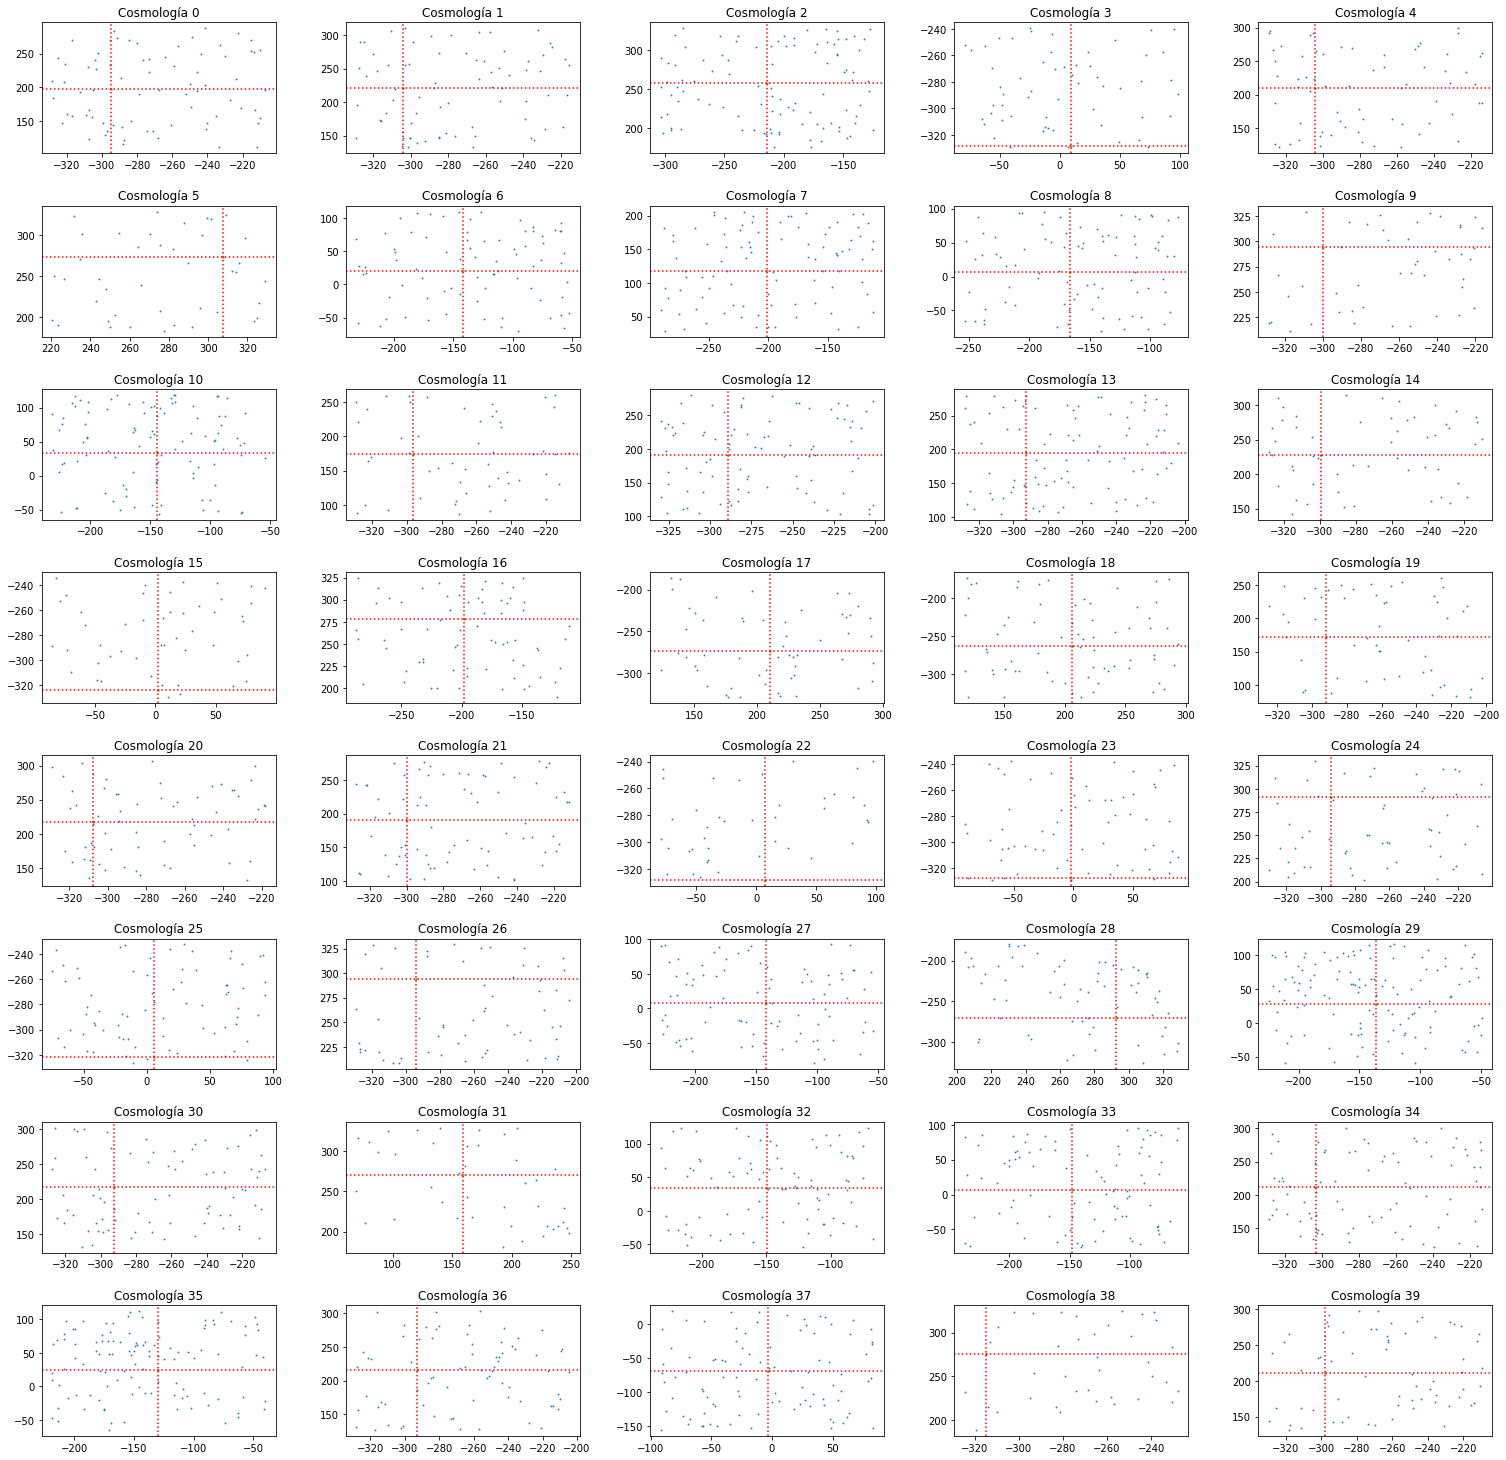

In [31]:
#Vecindades de los Máximos
fig, axs = plt.subplots(8,5, figsize=(26, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(len(CatalogosCorregidos)):
    axs[i].set_title("Cosmología " + str(i))
    axs[i].scatter(VecMax[i][:,1],VecMax[i][:,2],s=0.7)
    axs[i].scatter(MaxX[i],MaxY[i],s=1.8)
    axs[i].axvline(MaxX[i],ls = 'dotted',c='red')
    axs[i].axhline(MaxY[i],ls = 'dotted',c='red')
#plt.savefig("VecindadMayorVoid.png")

In [32]:
#Fracción de Volumen
def vol(a,b,c):
    return a*b*c*(4*np.pi/3)
Vt=720**3

In [33]:
VolVoid=[]
for i in range(len(CatalogosCorregidos)):
    V=CatalogosCorregidos[i]
    a=V[:,6]
    b=V[:,7]
    c=V[:,8]
    s=np.sum(vol(a,b,c))
    VolVoid.append(s)
VolVoid=np.asarray(VolVoid)

In [34]:
len(VolVoid/Vt)

40

In [35]:
for i in range(len(VolVoid)):
    print("Para la Cosmología " + str(i) + ", la fracción de volumen es: "+ str(np.take(VolVoid/Vt,i)))

Para la Cosmología 0, la fracción de volumen es: 0.21335892806629553
Para la Cosmología 1, la fracción de volumen es: 0.2052229299831091
Para la Cosmología 2, la fracción de volumen es: 0.21152253497679943
Para la Cosmología 3, la fracción de volumen es: 0.2113187843512139
Para la Cosmología 4, la fracción de volumen es: 0.20757174340313894
Para la Cosmología 5, la fracción de volumen es: 0.21428178290013075
Para la Cosmología 6, la fracción de volumen es: 0.20773783702088147
Para la Cosmología 7, la fracción de volumen es: 0.20698341739510606
Para la Cosmología 8, la fracción de volumen es: 0.20774726167461435
Para la Cosmología 9, la fracción de volumen es: 0.2120562885089886
Para la Cosmología 10, la fracción de volumen es: 0.20906019365907977
Para la Cosmología 11, la fracción de volumen es: 0.20326314649041793
Para la Cosmología 12, la fracción de volumen es: 0.20736601949503988
Para la Cosmología 13, la fracción de volumen es: 0.2132153547989277
Para la Cosmología 14, la fracción

In [36]:
print("El valor medio de la Fracción de Volumen es: " +str(np.mean(VolVoid/Vt)))

El valor medio de la Fracción de Volumen es: 0.2098415897743351


In [37]:
#Datos de las Cosmologias
Cosmologias=np.loadtxt("Desktop/AbacusCosmos_cosmologies.dat")

In [42]:
tit=["ombh2","omcdmh2"," w0"," ns"," sigma_8"," H0"," N_eff"]
ombh2=[]
omcdmh2=[]
w0=[]
ns=[]
sigma_8=[]
H0=[]
N_eff=[]
for i in range(len(Cosmologias)):
    print("Para la Cosmologia "+str(i))
    ombh2.append(np.float32(Cosmologias[i][0]))
    omcdmh2.append(np.float32(Cosmologias[i][1]))
    w0.append(np.float32(Cosmologias[i][2]))
    ns.append(np.float32(Cosmologias[i][3]))
    sigma_8.append(np.float32(Cosmologias[i][4]))
    H0.append(np.float32(Cosmologias[i][5]))
    N_eff.append(np.float32(Cosmologias[i][6]))
    for j in range(7):
        print(tit[j] +" "+ str(np.float32(Cosmologias[i][j])))

Para la Cosmologia 0
ombh2 0.02096096
omcdmh2 0.1224634
 w0 -1.139198
 ns 0.9300325
 sigma_8 0.853824
 H0 68.95004
 N_eff 3.046
Para la Cosmologia 1
ombh2 0.02169908
omcdmh2 0.1096392
 w0 -0.7647829
 ns 0.9823038
 sigma_8 0.7192845
 H0 62.99374
 N_eff 3.046
Para la Cosmologia 2
ombh2 0.02230419
omcdmh2 0.1139937
 w0 -1.083356
 ns 0.9704725
 sigma_8 0.8510273
 H0 72.28562
 N_eff 3.046
Para la Cosmologia 3
ombh2 0.02226266
omcdmh2 0.1221573
 w0 -0.9824886
 ns 0.9754183
 sigma_8 0.8581189
 H0 66.21955
 N_eff 3.046
Para la Cosmologia 4
ombh2 0.02284147
omcdmh2 0.1240096
 w0 -1.221581
 ns 0.9544018
 sigma_8 0.8887367
 H0 74.2083
 N_eff 3.046
Para la Cosmologia 5
ombh2 0.02183059
omcdmh2 0.1284267
 w0 -1.289901
 ns 0.9541059
 sigma_8 0.9129306
 H0 71.52358
 N_eff 3.046
Para la Cosmologia 6
ombh2 0.02166699
omcdmh2 0.1114661
 w0 -0.9692914
 ns 0.9603143
 sigma_8 0.7682739
 H0 68.60432
 N_eff 3.046
Para la Cosmologia 7
ombh2 0.02322985
omcdmh2 0.1063219
 w0 -0.787883
 ns 0.9873686
 sigma_8 0.7

Text(0.5, 1.0, 'Volumen de los Void')

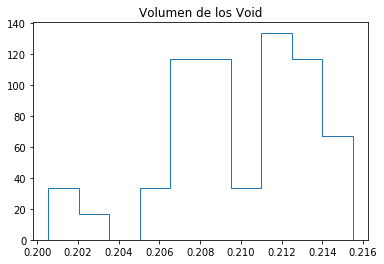

In [41]:
plt.hist(VolVoid/Vt,density=True, histtype="step")
plt.title("Volumen de los Void")

In [63]:
cte=[ombh2,omcdmh2, w0, ns, sigma_8, H0]

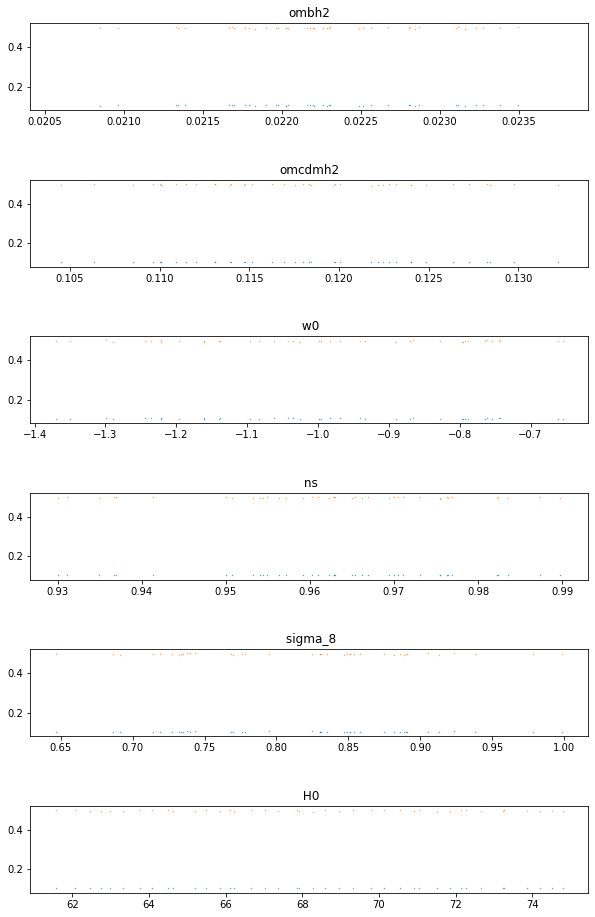

In [64]:
#Gráficas de las Constantes Cosmológicas
fig, axs = plt.subplots(6,1, figsize=(10, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.3)
axs=axs.ravel()
for i in range(len(cte)):
    axs[i].set_title(tit[i])
    axs[i].scatter(cte[i],percentilE[:,1],s=0.1)
    axs[i].scatter(cte[i],percentilE1[:,1],s=0.1)

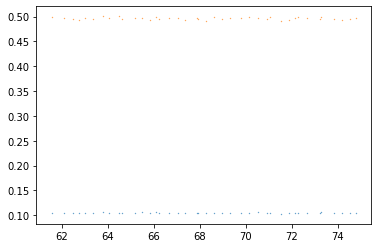

In [68]:
plt.scatter(H0,percentilE[:,1],s=0.1)
plt.scatter(H0,percentilE1[:,1],s=0.1)

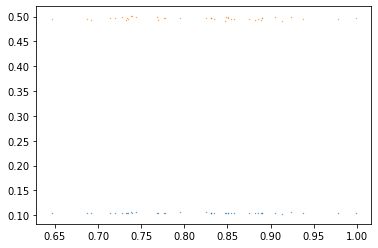

In [73]:
plt.scatter(sigma_8,percentilE[:,1],s=0.1)
plt.scatter(sigma_8,percentilE1[:,1],s=0.1)

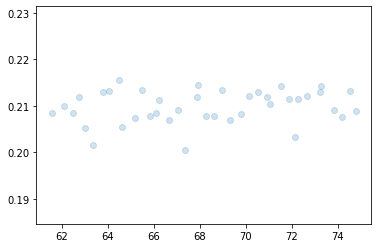

In [79]:
plt.scatter(H0,VolVoid/Vt,alpha=0.2)